In [1]:
import scipy.io
import numpy as np
import CMR_IA as cmr
import matplotlib.pyplot as plt
import pickle
from statistics import mean, stdev
import pprint
import import_ipynb
import time
import pandas as pd
import seaborn as sns

np.set_printoptions(edgeitems=20, linewidth=150,precision=4)

In [2]:
# get wordfreq quantile
with open('../Data/simu4_word_freq.pkl', 'rb') as inp:
    df = pickle.load(inp)

In [3]:
with open("../Data/simu4_design.pkl", 'rb') as inp:
    df_study = pickle.load(inp)
    df_test = pickle.load(inp)

In [4]:
s_mat = np.load('../Data/simu4_smat.npy')

In [84]:
params = cmr.make_default_params()
params.update(
    beta_enc = 0.4,
    beta_rec = 0.1,
    beta_rec_post = 0.2,
    gamma_fc = 0.1,
    s_fc = 0,
    c_thresh = 0.18,
    a = 2800,
    b = 2.14,
    m = 100,
    n = -6,
)
params

{'beta_enc': 0.4,
 'beta_rec': 0.1,
 'beta_rec_new': 0.5,
 'beta_rec_post': 0.2,
 'beta_distract': None,
 'phi_s': 2,
 'phi_d': 0.5,
 's_cf': 0,
 's_fc': 0,
 'kappa': 0.5,
 'eta': 0.5,
 'omega': 8,
 'alpha': 4,
 'c_thresh': 0.18,
 'lamb': 0.5,
 'rec_time_limit': 60000.0,
 'dt': 10,
 'nitems_in_accumulator': 50,
 'max_recalls': 50,
 'learn_while_retrieving': False,
 'a': 2800,
 'b': 2.14,
 'm': 100,
 'n': -6,
 'gamma_fc': 0.1,
 'gamma_cf': 0.5}

### Test phi_att

In [41]:
# df_study = df_study.loc[df_study.session < 1]
# # df_study

# df_test = df_test.loc[df_test.session < 1]
# # df_test

In [85]:
# # 100 sessions loop
# # beta_choice = np.arange(0.01,1,0.01)
# beta_choice = np.arange(0,20,0.5)
# s_new = []
# s_old = []
# for b in beta_choice:
#     # params.update(beta_enc=b)
#     # params.update(gamma_fc=b)
#     params.update(n=b)
#     df_simu = cmr.run_norm_recog_multi_sess(params,df_study,df_test,s_mat)
#     df_simu = df_simu.merge(df_test,on=['session','itemno'])
#     new, old = df_simu.groupby("old").csim.mean().to_numpy()
#     s_new.append(new)
#     s_old.append(old)
# df_exp = pd.DataFrame({'beta_choice':beta_choice, 's_new':np.array(s_new), 's_old':np.array(s_old)})
# df_exp

In [86]:
# fig, ax = plt.subplots()
# sns.lineplot(data=df_exp, x='beta_choice',y='s_old',ax=ax,label='old')
# sns.lineplot(data=df_exp, x='beta_choice',y='s_new',ax=ax,label='new')
# plt.xlabel("beta_enc")
# plt.ylabel("mean context similarity")
# plt.legend()
# plt.savefig('fig/simu4_beta.pdf')

In [87]:
# fig, ax = plt.subplots()
# sns.lineplot(data=df_exp, x='beta_choice',y='s_old',ax=ax,label='old')
# sns.lineplot(data=df_exp, x='beta_choice',y='s_new',ax=ax,label='new')
# plt.xlabel("phi_att")
# plt.ylabel("mean context similarity")
# plt.legend()
# # plt.savefig('fig/simu4_att.pdf')

### Test m and n on att_vec

In [88]:
df_study = df_study.loc[df_study.session < 1]
df_study

,itemno,item,itemno_old,freq,quantile,session
0,316,FARM,552,1161,8,0
1,477,LEOPARD,812,118,3,0
2,433,INSTRUCTOR,741,78,2,0
3,87,BOTTLE,153,1479,8,0
4,84,BOOT,150,149,3,0
...,...,...,...,...,...,...
95,249,CUSTARD,429,54,1,0
96,85,BOOTH,151,154,3,0
97,71,BIRD,129,752,7,0
98,774,SHOE,1288,249,5,0


In [89]:
df_test = df_test.loc[df_test.session < 1]
df_test

,itemno,item,itemno_old,freq,quantile,session,old
0,341,FORT,595,411,6,0,True
1,512,MANSION,864,156,3,0,True
2,66,BENCH,121,345,6,0,True
3,386,GUARD,667,658,7,0,False
4,57,BEE,112,185,4,0,True
...,...,...,...,...,...,...,...
195,960,WHEAT,1602,527,7,0,True
196,518,MATCH,878,775,7,0,True
197,623,PENCIL,1042,276,5,0,True
198,556,MULE,931,82,2,0,True


In [90]:
# df_test = df_test.loc[df_test.session < 1]
# df_test = df_test.iloc[0:10]

In [91]:
# rng = np.random.default_rng(seed=42)
# study_idx = rng.choice(df_test.index, 5, replace = False)
# df_study = df_test.iloc[study_idx]
# df_study.drop(labels='old', axis=1 ,inplace=True)
# df_study

In [92]:
# df_test['old'] = np.isin(df_test.index, study_idx)
# df_test

In [93]:
# # 10 trials loop
# # beta_choice = np.array([0,0.001,0.01,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1])
# beta_choice = np.arange(0,1.01,0.05)
# s_new = []
# s_old = []
# for b in beta_choice:
#     params.update(beta_enc=b)
#     model = cmr.CMR2(params, pres_mat, sem_mat, source_mat=None,
#            rec_mat=None, ffr_mat=None, cue_mat=cue_mat, task='Recog', mode='Final')
#     model.run_peers_recog_single_sess()
#     recs = model.rec_items
#     rts = model.rec_times
#     csims = model.recog_similarity
#     result = np.column_stack((recs,rts,csims))
#     df_thin.loc[df_thin.session==sess, ['s_resp','s_rt','csim']] = result
#     df_simu = df_thin.merge(df_test,on=['session','itemno'])
#     new, old = df_simu.groupby("old").csim.mean().to_numpy()
#     s_new.append(new)
#     s_old.append(old)
# df_exp = pd.DataFrame({'beta_choice':beta_choice, 's_new':np.array(s_new), 's_old':np.array(s_old)})
# df_exp

In [94]:
df_thin = df_test[['session','itemno']]
df_thin = df_thin.assign(s_resp=np.nan, s_rt=np.nan, csim=np.nan)

# extarct the session data
sess = 0
pres_mat = df_study.loc[df_study.session==sess,'itemno'].to_numpy()
pres_mat = np.reshape(pres_mat,(1, len(pres_mat)))
cue_mat = df_thin.loc[df_thin.session==sess,'itemno'].to_numpy()
sem_mat = s_mat

In [95]:
model = cmr.CMR2(params, pres_mat, sem_mat, source_mat=None,
           rec_mat=None, ffr_mat=None, cue_mat=cue_mat, task='Recog', mode='Final')

In [96]:
model.run_peers_recog_single_sess()

# in model:
# print(self.att_vec[self.all_nos_unique[item_idx]-1])
# print(np.dot(self.c_old[:self.nitems_unique], self.f[:self.nitems_unique].T))

In [97]:
# verified
# model.att_vec
# 2 * df.s_mean + 0.3 + 1

In [98]:
df['att_vec'] = model.att_vec
df['att_gamma'] = model.att_vec * params['gamma_fc']
df.sort_values(by='freq')

,item,itemno_old,itemno,freq,quantile,att_vec,att_gamma
790,SKILLET,1317,791,2,0,6.789615,0.678961
173,CHIPMUNK,304,174,2,0,8.445719,0.844572
856,TANGERINE,1431,857,2,0,5.469662,0.546966
794,SKUNK,1321,795,3,0,9.481899,0.948190
383,GRIZZLY,662,384,3,0,5.376451,0.537645
...,...,...,...,...,...,...,...
974,WORLD,1622,975,13345,9,0.212734,0.021273
957,WELL,1600,958,15116,9,0.000000,0.000000
510,MAN,862,511,17486,9,7.650555,0.765055
29,BACK,65,30,17657,9,4.159465,0.415946


In [99]:
df.groupby("quantile").att_gamma.mean()

quantile
0    0.571428
1    0.596504
2    0.541356
3    0.507751
4    0.519065
5    0.477714
6    0.461541
7    0.432900
8    0.392035
9    0.389857
Name: att_gamma, dtype: float32

In [100]:
df.groupby("quantile").att_vec.mean()

quantile
0    5.714277
1    5.965043
2    5.413560
3    5.077506
4    5.190650
5    4.777143
6    4.615413
7    4.328997
8    3.920345
9    3.898574
Name: att_vec, dtype: float32

<AxesSubplot:xlabel='att_vec', ylabel='itemno'>

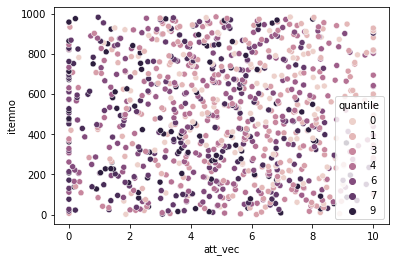

In [101]:
sns.scatterplot(data=df,x='att_vec',y='itemno',hue='quantile')

In [102]:
# beta = params['beta_enc']
# b = np.log(1/beta - 1)
# def cal_att_beta(x):
#     if x.att_vec <= 0:
#         tmp = 0.15
#     else:
#         tmp = 1 / (1 + np.exp(x.att_vec + b))
#     return tmp
# df['att_beta'] = df.apply(cal_att_beta, axis = 1)
# df.sort_values(by='freq')

In [103]:
# m = params['m']
# n = params['n']
# p = params['p']
# def cal_att_beta(x):
#     tmp = x.att_vec * params['gamma_fc']
#     return tmp
# df['att_beta'] = df.apply(cal_att_beta, axis = 1)
# df.sort_values(by='freq')

In [104]:
# sns.scatterplot(data=df,x='att_beta',y='itemno',hue='quantile')

In [105]:
# df.groupby("quantile").att_beta.mean()

In [106]:
recs = model.rec_items
rts = model.rec_times
csims = model.recog_similarity
result = np.column_stack((recs,rts,csims))
df_thin.loc[df_thin.session==sess, ['s_resp','s_rt','csim']] = result
df_simu = df_thin.merge(df_test,on=['session','itemno'])
df_simu

,session,itemno,s_resp,s_rt,csim,item,itemno_old,freq,quantile,old
0,0,341,0.0,1906.922974,0.000501,FORT,595,411,6,True
1,0,512,1.0,1685.990479,0.417040,MANSION,864,156,3,True
2,0,66,0.0,1954.934570,0.012120,BENCH,121,345,6,True
3,0,386,0.0,1904.880859,0.000000,GUARD,667,658,7,False
4,0,57,0.0,1972.052490,0.016194,BEE,112,185,4,True
...,...,...,...,...,...,...,...,...,...,...
195,0,960,1.0,2406.862549,0.250699,WHEAT,1602,527,7,True
196,0,518,0.0,2410.086426,0.109927,MATCH,878,775,7,True
197,0,623,1.0,2293.657715,0.273211,PENCIL,1042,276,5,True
198,0,556,1.0,2576.151367,0.218936,MULE,931,82,2,True


In [107]:
df_simu.groupby(["old","quantile"]).csim.mean()

old    quantile
False  0           0.000000
       1           0.000000
       2           0.000000
       3           0.000000
       4           0.000000
       5           0.000000
       6           0.000000
       7           0.000000
       8           0.000000
       9           0.000000
True   0           0.208216
       1           0.240170
       2           0.202181
       3           0.183720
       4           0.132392
       5           0.206377
       6           0.160563
       7           0.227277
       8           0.173271
       9           0.193950
Name: csim, dtype: float64

In [83]:
# df["s_mean"] = np.mean(s_mat,axis=1)
# df["log_freq"] = np.log(df["freq"])
# df

In [31]:
# # verified
# print('all nos \n',model.all_nos_unique)
# print('pres nos \n', model.pres_nos)
# print('pres index \n',model.pres_indexes)
# print(model.nitems_unique)
# print(model.nelements)
# print(model.distractor_idx)
# print('cue nos \n', model.cues_nos)
# print('cue index \n', model.cues_indexes)